In [78]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)


In [ ]:
! pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [79]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [80]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
profile = ProfileReport(df, title = 'Mall Customers', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

In [ ]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df_cat['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [ ]:
df_cat = pd.get_dummies(df)

In [ ]:
df_cat

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [ ]:
df_cat.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Female', 'Genre_Male'],
      dtype='object')

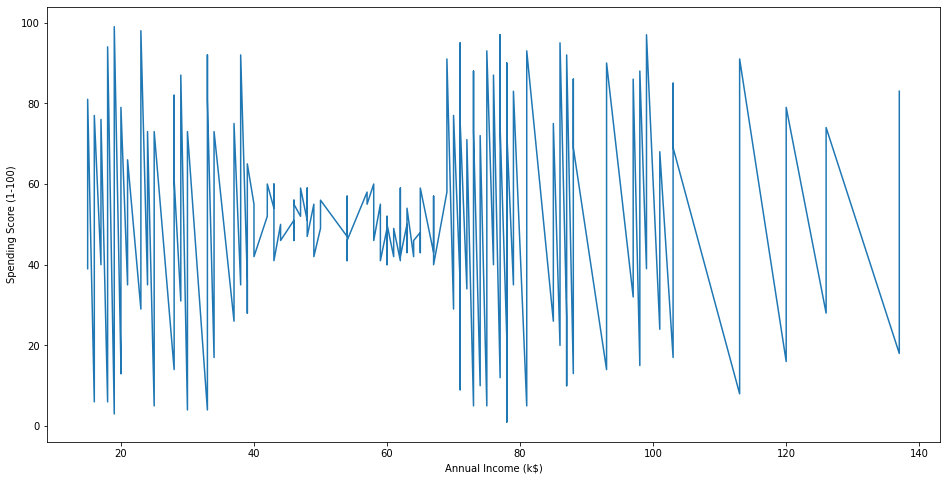

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(df_cat['Annual Income (k$)'], df_cat['Spending Score (1-100)'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
fig.show()

In [ ]:
feature = ['Age', 'Annual Income (k$)', 'Genre_Female', 'Genre_Male']

In [ ]:
y = df_cat['Spending Score (1-100)']
X = df_cat[feature]

In [ ]:
train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,Age,Annual Income (k$),Genre_Female,Genre_Male
79,49,54,1,0
197,32,126,0,1
38,36,37,1,0
24,54,28,1,0
122,40,69,1,0


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
perm = PermutationImportance(model, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.2080 ± 0.0989,Age
0.0128 ± 0.0061,Annual Income (k$)
0.0018 ± 0.0040,Genre_Male
0.0013 ± 0.0023,Genre_Female


In [ ]:
perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3659 ± 0.2098,Age
0.0038 ± 0.0028,Genre_Female
0.0024 ± 0.0029,Genre_Male
-0.0330 ± 0.0223,Annual Income (k$)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
pd.Series(y_pred)

0     59.828129
1     58.849457
2     37.046989
3     54.918427
4     39.843295
5     64.235528
6     55.676850
7     51.875652
8     46.072897
9     59.895472
10    49.209690
11    48.940603
12    55.318086
13    61.291341
14    45.597269
15    59.572522
16    44.290849
17    50.237656
18    34.224235
19    62.121392
20    62.153149
21    52.458778
22    56.116893
23    51.619817
24    62.709315
25    32.029560
26    62.467188
27    34.511599
28    57.449760
29    61.085027
30    55.290671
31    41.373337
32    45.390215
33    58.329104
34    49.627114
35    45.237765
36    58.787196
37    55.824959
38    45.888690
39    48.357021
dtype: float64

In [ ]:
y_test

95     52
15     79
30      4
158     1
128    11
115    50
69     47
170    13
174    13
45     65
66     50
182    15
165    75
78     52
186    24
177    69
56     50
152    20
82     41
68     59
124    29
16     35
148    22
93     40
65     59
60     56
84     57
67     48
125    77
132    34
9      72
18     29
55     41
75     54
150    17
104    56
135    88
137    73
164    26
76     53
Name: Spending Score (1-100), dtype: int64

In [ ]:
model.score(X_test,y_test)

0.025478181600746108

In [ ]:
model.coef_

array([-0.58792363,  0.05386299,  0.59923281, -0.59923281])

In [ ]:
print('MAE = ' + str(mean_absolute_error(y_test,y_pred)))
print('MSE = ' + str(mean_squared_error(y_test,y_pred)))
print('RMSE = ' + str(mean_squared_error(y_test,y_pred, squared=False)))

MAE = 18.151395326685105
MSE = 480.67314170724796
RMSE = 21.924259205438343


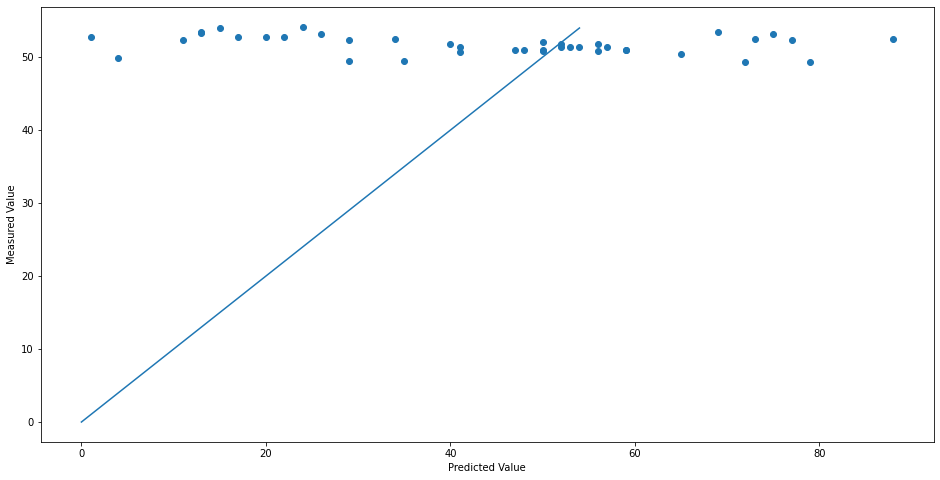

In [93]:
fig, ax = plt.subplots(figsize = (16,8))
plt.scatter(y_test, y_pred)
plt.plot([0,54],[0,54])
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Measured Value')
fig.show()